## ESPN NBA Fantasy League API ** Trending Players Fantasy Stats **

In [1]:
import requests
import pandas as pd

**ESPN Scoring Period** is different depending on the day. First step is to get the current Scoring Period to get most up-to-date stats for the available players in the specified league

In [2]:
# URL to get the current scoring period for the day
scoringPeriodUrl = " https://fantasy.espn.com/apis/v3/games/fba/seasons/2023?view=kona_game_state"

### It is NECCESSARY that you have **INSPECT ELEMENT** enabled on your browser to get the neccessary information. **Cookies** and **Headers** are used to authenticate to ESPN that it is you that is requesting their data 

The two fields that we need from Cookies are **'swid'** and **'espn_s2'**. These can be found in the **'Cookies'** section in **Headers** 

<div>
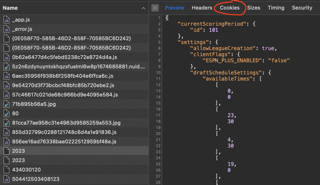
</div>

In [3]:
# Tells ESPN that it is you that wants to retrieve their data by authenticating your personal cookies
# One of the parameters used for requests.get()
espn_cookies = {
    'swid': '{0E058F70-585B-46D2-858F-70585BC6D242}',
    'espn_s2': 'AECIAOf2rW2j6K21Nz4%2BDGYAz8lvXn%2F2WfocRde2mPjXwuRBTD7SSgiJS7H7BEfX1eBFfQsG8pYrRXAsPOWe6j80D12EMMXK2z7SOQ4Djk4X0fxWvcVu%2Fg3mPFyqMtIq5NqvJbUyaPJXvnlCxqjD3Bx89%2FLL9uvJ0%2BfTNIzQyXp6U9oBAQsTdKXlF644oBtoe7O%2BrBFCesl%2BLpKiXrNI9Wdf5eMoAsl31zM8h2FE2WdP8Y%2FfvKEJE%2BhWtSVeYJBa3iv53OiG%2FOtfnBob7dO64c2SKjXRh1m%2BlF3RAOqNmLg6T847J9OUNQAi%2FM0FIU7me26CmCkdpzuAap5xb%2FmcWFxr'
}

# Option to use a user input for the 'swid' and 'espn_s2'
#espn_cookies['swid'] = input("Enter 'swid': ")
#espn_cookies['espn_s2'] = input("Enter 'espn_s2': ")

In [4]:
# Same as cookies: used to authenticate to ESPN that it is you when requesting data
headerz = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15'
}

**requests.get()** takes in 3 parameters: URL, headers, cookies. In Python, you have to assign headers and cookies to the correct data storage reference

In [5]:
# Retrieves the raw data
scoringPeriod = requests.get(scoringPeriodUrl, 
                 headers=headerz,
                 cookies=espn_cookies)

# Stores the raw data into a .json file 
scoringPeriodData = scoringPeriod.json()

# Indexes through the data to only get the current Scoring Period ID
currentScoringPeriod = scoringPeriodData['currentScoringPeriod']['id']

currentScoringPeriod  # Test

102

**"Headerz"** is updated with additional fields in order to retrieve the correct data that we want which in this case is the stats of the **Top Trending Players** in the specified league

In [6]:
# This header section has additional fields that filter the data that is retrieved. In this case, I only want to 
# get the data of the available players who are the most TRENDING. If we use the 
# previous headerz, the data returned will be data for the first 50 players in alphabetical order
headerz = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15',
    'Referer': 'https://fantasy.espn.com/basketball/players/add?leagueId=434030120&statSplit=last7&view=trending',
    'X-Fantasy-Source': 'kona',
    # Filter uses the current Scoring Period
    'X-Fantasy-Filter': '{"players":{"filterStatus":{"value":["FREEAGENT","WAIVERS"]},"filterSlotIds":{"value":[0,1,2,3,4,5,6,7,8,9,10,11]},"filterRanksForScoringPeriodIds":{"value":['+str(currentScoringPeriod)+']},"sortRating":{"value":1,"sortPriority":1,"sortAsc":false},"limit":12,"filterStatsForTopScoringPeriodIds":{"value":5,"additionalValue":["002023","102023","002022","012023","022023","032023","042023"]}}}',
    'X-Fantasy-Platform': 'kona-PROD-329ab810189bc3c7f613e890143a5dfa53071abf'
}

League ID is different for each league. For **Private Leagues**, **Cookies** are used to authenticate that it is you trying to access the data and not someone outside of your league. 

In [7]:
# League ID for your league can be found in the URL of your fantasy league home page
leagueID = "434030120"

# Option to use a user input to get the League ID
#leagueID = input("Enter your League ID: ")

In [8]:
# URL get the data of players based on the League ID
url = 'https://fantasy.espn.com/apis/v3/games/fba/seasons/2023/segments/0/leagues/'+leagueID+'?view=kona_player_info'
r = requests.get(url, 
                 headers=headerz,
                 cookies=espn_cookies)

# Stores the raw data into a .json file
espn_data = r.json()

#espn_data  # Test

In [9]:
# Only want the data of the players
espn_data = espn_data['players']

#espn_data  # Test

There are **11** players total in the data received that was specified in the **"X-Fantasy-Filter"** under **"limit"**. We go through each player and assign only their **'player'** dictionary because it holds all the info needed 

In [10]:
# For each player, only want to look at the 'player' information that holds name, stats, and injury status
for i in range(0, 12):
    espn_data[i] = espn_data[i]['player']

#espn_data  # Test

A new dictionary is created to store all the player's stats and position called **playerStats** 

In [11]:
playerStats = {} # Stores the Fantasy Points for each player's last 5 games and the Last 7 Day Average Stats and position

for i in range(0, 12):
    
    #Creates a nested dictionary by creating a dictionary at index i to store all each player's stats
    playerStats[i] = {}
    
    for n in range(0, 5):
        # Only care about the "appliedTotal" which is the total Fantasy Points scored for that game
        # Stores the last 5 game Fantasy Points for player at index i
        playerStats[i][n] = round(espn_data[i]['stats'][n]['appliedTotal']) # Rounds to nearest whole number
    
    for x in range(5, 11):
        # Index 7 holds the Last 7 Day AVG Fantasy Points
        if(x == 7):
            playerStats[i][x] = round(espn_data[i]['stats'][x]['appliedAverage'], 1) # Rounds to nearest tenths place
    
#playerStats  # Test

In [12]:
# Stores the position slot number(s) that represents the position of each player 
playerPosition = {}

for q in range(0, 12):
    
    #Creates a nested dictionary by creating a dictionary at index q to store all each player's position
    playerPosition[q] = {}
    
    idx = 0
    slots = espn_data[q]['eligibleSlots'] # All possible position slots
    
    # Nested for loop that goes through all position slots 
    for w in range(0, len(slots)):
        # ONLY care about positions from PG to C (0-4) and NOT the bench slots (5-13)
        if((espn_data[q]['eligibleSlots'][w]) <= 4): 
            playerPosition[q][idx] = espn_data[q]['eligibleSlots'][w]
            idx+=1

#playerPosition  # Test

ESPN represents the position(s) of players as slot numbers from 0-13. The **playerPosition** dictionary holds the real position of the player and discards the bench slot numbers. In Basketball, the 5 main positions are PG to C, which are represented as 0-4 in the slot positions. A **switch statement** is used to convert those slot numbers to the **real position(s)** of the player 

In [13]:
for r in range(0, 12):
    for t in range(0, len(playerPosition[r])):
        position = playerPosition[r][t]
        
        # Switch statement to convert the position slot to the actual position
        match position:
            case 0:
                playerPosition[r][t] = "PG"
            case 1:
                playerPosition[r][t] = "SG"
            case 2:
                playerPosition[r][t] = "SF"
            case 3:
                playerPosition[r][t] = "PF"
            case 4:
                playerPosition[r][t] = "C"

#playerPosition  # Test

Goes through **playerPosition** and concatenates the secondary position(s) to the primary position of player if applicable

In [14]:
for y in range(0, 12):
    position = playerPosition[y][0] # Primary position of player
    for u in range(1, len(playerPosition[y])):
        position += '/' + playerPosition[y][u] # Adds the secondary position(s) to replicate the real position on fantasy app
    playerStats[y]['position'] = position  # Adds the positions(s) to playerStats dictionary
    
#playerStats  # Test

Turn the 2 dictionaries that hold the neccessary data into dataframes 

In [15]:
# Converts the dictionaries into dataframes
df1 = pd.DataFrame(espn_data)
df2 = pd.DataFrame(playerStats)

# Swaps the order of the columns and rows: columns = stats, rows = players
# Swapped in order to match the index with df1
df2 = df2.transpose()

df2  # Test

,0,1,2,3,4,7,position
0,33,39,25,54,22,34.6,PF
1,28,44,35,24,35,32.8,SG/SF
2,25,40,54,37,32,39.0,SG/PF
3,46,9,47,23,50,35.0,SG
4,39,17,49,54,7,33.2,PG
5,22,21,64,23,17,29.4,C
6,37,33,31,52,39,38.2,PG
7,6,34,25,49,16,28.5,C
8,32,24,13,43,45,28.0,PF
9,0,0,30,39,36,35.0,C


In [16]:
# Filters only the 'fullName', 'injured', and 'injuryStatus' status from the dataframe
player_df = df1[['fullName', 'injured', 'injuryStatus']]

player_df  # Test

,fullName,injured,injuryStatus
0,Keegan Murray,False,ACTIVE
1,RJ Barrett,False,ACTIVE
2,Delon Wright,False,ACTIVE
3,Kevin Huerter,False,ACTIVE
4,Dennis Schroder,False,ACTIVE
5,Thomas Bryant,False,ACTIVE
6,Mike Conley,False,ACTIVE
7,Mark Williams,False,ACTIVE
8,Jalen McDaniels,False,ACTIVE
9,Steven Adams,True,OUT


In [17]:
# Joins the two dataframes and matches the index of player_df
result = player_df.join(df2, how = 'left')

# Reorders the columns
result = result[['fullName', 'position', 'injured', 'injuryStatus', 7, 0, 1, 2, 3, 4]]

# Renames the columns
result.rename(columns = {0: "Last Game FPs", 1: "2nd Last FPs", 2: "3rd Last FPs", 3: "4th Last FPs", 4: "5th Last FPs", 7: "7 Day Average"})

,fullName,position,injured,injuryStatus,7 Day Average,Last Game FPs,2nd Last FPs,3rd Last FPs,4th Last FPs,5th Last FPs
0,Keegan Murray,PF,False,ACTIVE,34.6,33,39,25,54,22
1,RJ Barrett,SG/SF,False,ACTIVE,32.8,28,44,35,24,35
2,Delon Wright,SG/PF,False,ACTIVE,39.0,25,40,54,37,32
3,Kevin Huerter,SG,False,ACTIVE,35.0,46,9,47,23,50
4,Dennis Schroder,PG,False,ACTIVE,33.2,39,17,49,54,7
5,Thomas Bryant,C,False,ACTIVE,29.4,22,21,64,23,17
6,Mike Conley,PG,False,ACTIVE,38.2,37,33,31,52,39
7,Mark Williams,C,False,ACTIVE,28.5,6,34,25,49,16
8,Jalen McDaniels,PF,False,ACTIVE,28.0,32,24,13,43,45
9,Steven Adams,C,True,OUT,35.0,0,0,30,39,36


In [42]:
result.to_csv("Fantasy_Basketball_Trending_Players_Stats.csv", index = False)